In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Predikce počtu obyvatel z velikosti města 

Načteme si data. Obsahují informace o městech, jejich rozloze a počtu obyvatel. Chtěli bych vytvořil model závislosti počtu obyvatel na rozloze města. 

In [2]:
df_populace = pd.read_csv("population.csv", index_col=0)
df_populace.sample(6)

,Oblast,Rozloha,Počet obyvatel
19,"Harbin,",200,4609000
58,Johannesburg-East Rand,1000,7960000
68,"Tianjin, TJ",740,9596000
79,Buenos Aires,1020,13913000
32,"Pune, MAH",185,5376000
82,Bangkok,950,14910000


Data si zobrazíme. 

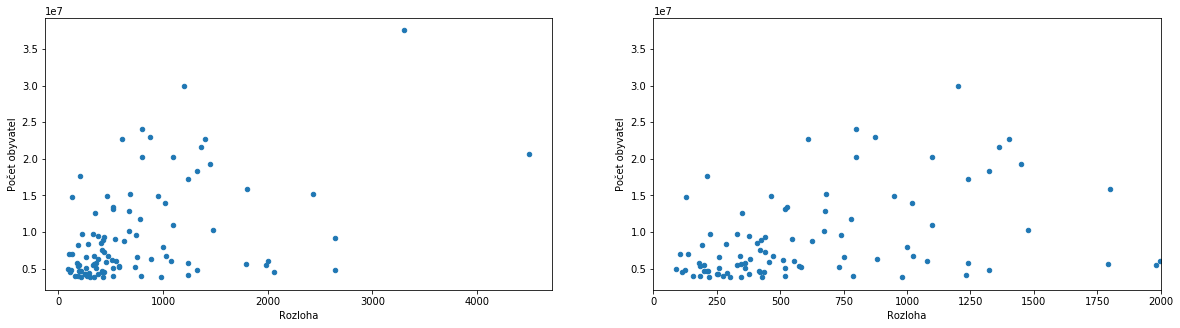

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", ax=ax[0]) 
df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", xlim=[0,2000], ax=ax[1]);


Vsutpní proměnná (X) bude "Rozloha", odezva (y) je "Počet obyvatel".  

In [4]:
X = df_populace[["Rozloha"]]
y = df_populace["Počet obyvatel"]

Jako *baseline* řešení zkusíme vzít průměrnou hodnotu populace. 

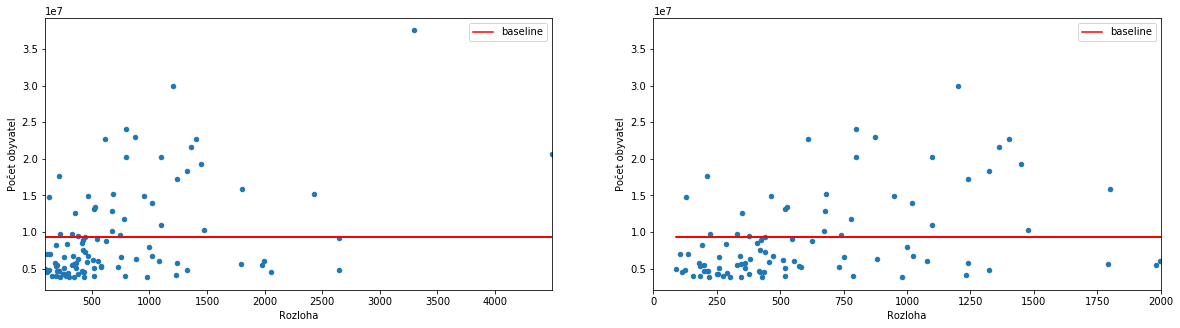

In [5]:
df_populace["baseline"] = df_populace.mean()["Počet obyvatel"]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", ax=ax[0]) 
df_populace.plot(x="Rozloha", y="baseline", color="red", ax=ax[0]);
df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", xlim=[0,2000], ax=ax[1])
df_populace.plot(x="Rozloha", y="baseline", xlim=[0,2000], color="red", ax=ax[1]);



Máme 100 datových vzorků, vezměme si tedy 70 jako trénovací data a zbylých 30 nechme na testování.

In [6]:
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]

Jako model zvolme lineární regresi, je to nejjednodušší, co můžeme použít.

In [7]:
from sklearn.linear_model import LinearRegression

Model natrénujeme a učíme predikci jak na testovacíh, tak na trénovacích datech. 

In [8]:
cerna_krabicka = LinearRegression()
cerna_krabicka.fit(X_train, y_train)

df_populace.loc[df_populace.index[:70],"predikce"] = cerna_krabicka.predict(X_train)
df_populace.loc[df_populace.index[70:], "predikce"] = cerna_krabicka.predict(X_test)

Zobrazíme si výslednou predikci.

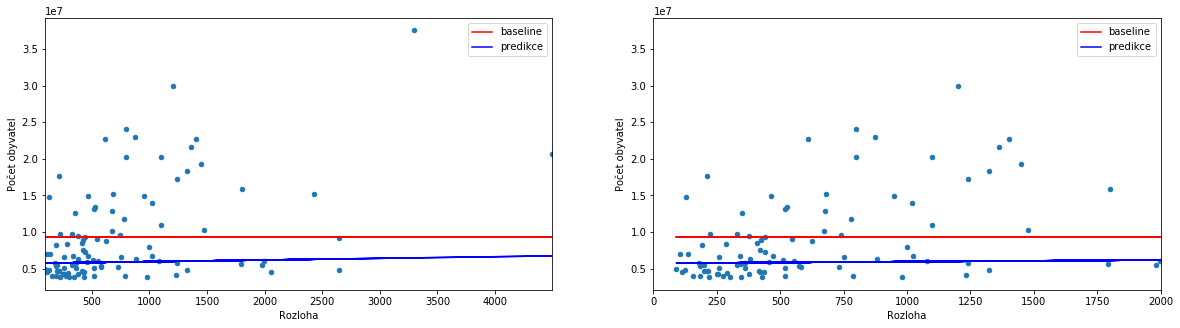

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", ax=ax[0])
df_populace.plot(x="Rozloha", y="baseline", color="red", ax=ax[0]);
df_populace.plot(x="Rozloha", y="predikce", color="blue", ax=ax[0]);
df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", xlim=[0,2000], ax=ax[1])
df_populace.plot(x="Rozloha", y="baseline", color="red", ax=ax[1]);
df_populace.plot(x="Rozloha", y="predikce", xlim=[0,2000], color="blue", ax=ax[1]);

- Přijdeš na to, proč černá krabička tolik podhodnocuje?

- Nápověda: zkus si zobrazit zvlášť trénovací a testovací data a podívat se, jak na nich vypadá predikce.

# Jak na to lépe?


In [10]:
from ____________ import ________ 

X_train,  X_test, y_train, y_test = ________

cerna_krabicka = LinearRegression()
cerna_krabicka.fit(X_train, y_train)

df_populace.loc[X_train.index,"predikce2"] = cerna_krabicka.predict(X_train)
df_populace.loc[X_test.index, "predikce2"] = cerna_krabicka.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", ax=ax[0])
df_populace.plot(x="Rozloha", y="baseline", color="red", ax=ax[0]);
df_populace.plot(x="Rozloha", y="predikce", color="blue", ax=ax[0]);
df_populace.plot(x="Rozloha", y="predikce2", color="green", ax=ax[0]);
df_populace.plot.scatter(x="Rozloha", y="Počet obyvatel", xlim=[0,2000], ax=ax[1])
df_populace.plot(x="Rozloha", y="baseline", color="red", ax=ax[1]);
df_populace.plot(x="Rozloha", y="predikce2", color="green", ax=ax[1]);
df_populace.plot(x="Rozloha", y="predikce", xlim=[0,2000], color="blue", ax=ax[1]);


ModuleNotFoundError: No module named '____________'